In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные о поездках

In [2]:
df1 = pd.read_csv('2016-Q3-Trips-History-Data-1.csv')
df2 = pd.read_csv('2016-Q3-Trips-History-Data-2.csv')
frames = [df1, df2]
df = pd.concat(frames)

In [3]:
df.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,840866,8/31/2016 23:59,9/1/2016 0:13,31117,15th & Euclid St NW,31228,8th & H St NW,W20409,Registered
1,656098,8/31/2016 23:58,9/1/2016 0:09,31279,19th & G St NW,31600,5th & K St NW,W20756,Registered
2,353159,8/31/2016 23:58,9/1/2016 0:04,31107,Lamont & Mt Pleasant NW,31101,14th & V St NW,W22626,Registered
3,219234,8/31/2016 23:58,9/1/2016 0:02,31200,Massachusetts Ave & Dupont Circle NW,31212,21st & M St NW,W00980,Casual
4,213473,8/31/2016 23:56,8/31/2016 23:59,31281,8th & O St NW,31280,11th & S St NW,W21338,Registered


In [4]:
print df.dtypes
print df.values.shape

Duration (ms)            int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member Type             object
dtype: object
(1067987, 9)


### Теперь обработаем станции

In [5]:
import json
with open('capital_bikeshare_station_information_fixed.json') as json_data:
    data_s = json.load(json_data)

In [6]:
bikestations = pd.DataFrame(data_s)

In [7]:
bikestations.head()

,capacity,eightd_has_key_dispenser,eightd_station_services,lat,lon,name,region_id,rental_methods,rental_url,short_name,station_id
0,15,False,NaN,38.858971,-77.053230,Eads St & 15th St S,41,"[KEY, CREDITCARD]",http://app.capitalbikeshare.com/vIiR/zVsfTIsOT...,31000,1
1,11,False,NaN,38.857250,-77.053320,18th & Eads St.,41,"[KEY, CREDITCARD]",http://app.capitalbikeshare.com/vIiR/zVsfTIsOT...,31001,2
2,17,False,NaN,38.856425,-77.049232,20th & Crystal Dr,41,"[KEY, CREDITCARD]",http://app.capitalbikeshare.com/vIiR/zVsfTIsOT...,31002,3
3,11,False,NaN,38.860170,-77.049593,15th & Crystal Dr,41,"[KEY, CREDITCARD]",http://app.capitalbikeshare.com/vIiR/zVsfTIsOT...,31003,4
4,11,False,NaN,38.857866,-77.059490,Aurora Hills Community Ctr/18th & Hayes St,41,"[KEY, CREDITCARD]",http://app.capitalbikeshare.com/vIiR/zVsfTIsOT...,31004,5


In [8]:
bikestations.dtypes

capacity                      int64
eightd_has_key_dispenser       bool
eightd_station_services      object
lat                         float64
lon                         float64
name                         object
region_id                     int64
rental_methods               object
rental_url                   object
short_name                   object
station_id                   object
dtype: object

In [9]:
bikestations['short_name'] = pd.to_numeric(bikestations['short_name'])

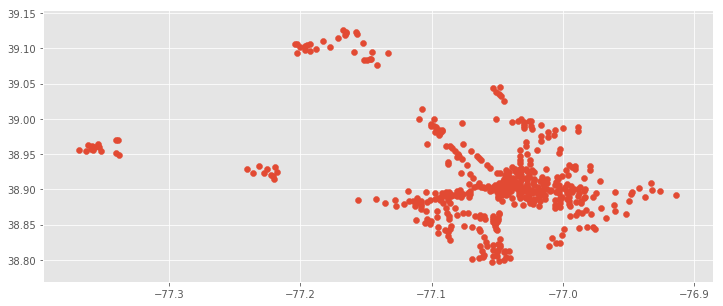

In [10]:
coords = bikestations[['lat','lon']].values
plt.scatter(coords[:,1], coords[:, 0])

[432  28  10  15]


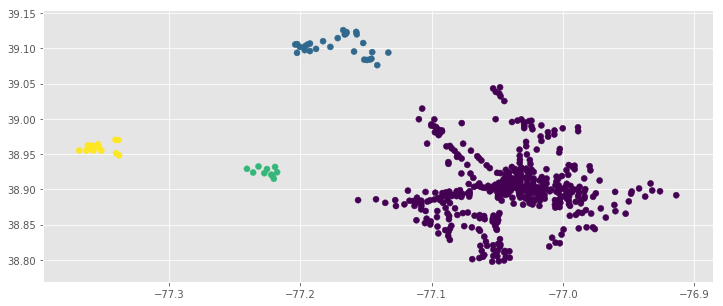

In [11]:
from sklearn.cluster import DBSCAN #Должен ставить большой кластер на 1е место, как на самом деле - хз
subcities = DBSCAN(eps=0.05).fit_predict(coords)
plt.scatter(coords[:,1], coords[:, 0], c = subcities)
print np.bincount(subcities)

In [12]:
bikestations.subcity = subcities

### Проверим, много ли междугородних поездок

In [13]:
df[(df['Start station number'].isin(bikestations[bikestations.subcity!=0].short_name.values)) 
   & (df['End station number'].isin(bikestations[bikestations.subcity==0].short_name.values))]

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
8207,7848298,8/31/2016 9:53,8/31/2016 12:04,32030,Broschart & Blackwell Rd,31308,39th & Veazey St NW,W00821,Registered
130439,5151935,8/20/2016 16:29,8/20/2016 17:55,32007,E Montgomery Ave & Maryland Ave,31407,14th St & Colorado Ave NW,W20607,Registered
130454,5216084,8/20/2016 16:28,8/20/2016 17:55,32007,E Montgomery Ave & Maryland Ave,31407,14th St & Colorado Ave NW,W20658,Registered
130474,6340138,8/20/2016 16:27,8/20/2016 18:12,32032,Fleet St & Ritchie Pkwy,32053,Medical Center Metro,W22048,Registered
212449,2110421,8/12/2016 18:03,8/12/2016 18:38,32047,Rockville Metro West,32053,Medical Center Metro,W01396,Registered
240299,2367008,8/10/2016 11:00,8/10/2016 11:39,32032,Fleet St & Ritchie Pkwy,32048,Bethesda Metro,W22114,Registered
417996,5685687,7/26/2016 10:38,7/26/2016 12:12,32032,Fleet St & Ritchie Pkwy,32039,Old Georgetown Rd & Southwick St,W00146,Registered
547796,31915066,7/15/2016 15:17,7/16/2016 0:09,32052,Key West Ave & Siesta Key Way,32035,Georgia Ave & Spring St,W21457,Casual
60559,4997813,9/24/2016 18:36,9/24/2016 20:00,32032,Fleet St & Ritchie Pkwy,32048,Bethesda Metro,W21531,Registered
308296,24675169,9/4/2016 11:24,9/4/2016 18:15,32007,E Montgomery Ave & Maryland Ave,32013,Montgomery & East Ln,W22874,Casual


In [14]:
df[(df['Start station number'].isin(bikestations[bikestations.subcity==0].short_name.values)) 
   & (df['End station number'].isin(bikestations[bikestations.subcity!=0].short_name.values))]

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
144324,4204984,8/19/2016 14:21,8/19/2016 15:31,31014,Lynn & 19th St North,32017,Monroe St & Monroe Pl,W22339,Registered
199977,6953974,8/14/2016 8:50,8/14/2016 10:46,31114,18th St & Wyoming Ave NW,32031,Taft St & E Gude Dr,W00196,Registered
234504,7024161,8/10/2016 18:48,8/10/2016 20:45,31014,Lynn & 19th St North,32017,Monroe St & Monroe Pl,W21868,Registered
331906,2111444,8/3/2016 1:36,8/3/2016 2:11,32048,Bethesda Metro,32032,Fleet St & Ritchie Pkwy,W21482,Registered
486126,5197224,7/20/2016 10:26,7/20/2016 11:53,31315,McKinley St & Connecticut Ave NW,32032,Fleet St & Ritchie Pkwy,W00597,Registered
537902,8209998,7/16/2016 11:11,7/16/2016 13:27,31314,33rd & Water St NW,32032,Fleet St & Ritchie Pkwy,W22812,Casual
549882,2677805,7/15/2016 11:37,7/15/2016 12:22,32039,Old Georgetown Rd & Southwick St,32032,Fleet St & Ritchie Pkwy,W00446,Registered
573277,22565555,7/13/2016 13:53,7/13/2016 20:09,31312,Wisconsin Ave & O St NW,32004,Fallsgrove Blvd & Fallsgrove Dr,W22536,Casual
574050,2890691,7/13/2016 12:11,7/13/2016 12:59,32039,Old Georgetown Rd & Southwick St,32032,Fleet St & Ritchie Pkwy,W22468,Registered
608097,4101123,7/10/2016 17:06,7/10/2016 18:14,32027,Battery Ln & Trolley Trail,32032,Fleet St & Ritchie Pkwy,W20151,Registered


### Их мало, уберем все пригородные поездки, на потоки внутри центра это не повлияет

In [15]:
df = df[(df['Start station number'].isin(bikestations[bikestations.subcity==0].short_name.values)) 
   & (df['End station number'].isin(bikestations[bikestations.subcity==0].short_name.values))]

In [16]:
bikestations = bikestations[bikestations.subcity==0]

###  Теперь проверим данные на отсутствие разрывов

In [17]:
df['Start date']=pd.to_datetime(df['Start date'])
df['End date']=pd.to_datetime(df['End date'])

In [18]:
print df['Start date'].min(), df['Start date'].max()

2016-07-01 00:00:00 2016-09-30 23:59:00


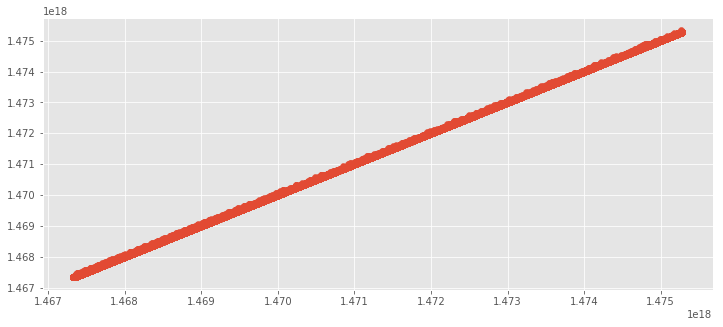

In [19]:
start_date = df['Start date'].astype(np.int64)
end_date = df['End date'].astype(np.int64)
plt.scatter(start_date, end_date)

In [20]:
df.groupby(['Start station number']).describe()

Duration (ms)                                        \
                             count          mean           std       min   
Start station number                                                       
31000                        710.0  2.287553e+06  5.958146e+06  114960.0   
31001                        809.0  1.413271e+06  3.540355e+06   71688.0   
31002                       2180.0  1.538040e+06  2.479584e+06   63593.0   
31003                       1770.0  1.695210e+06  3.489771e+06   62073.0   
31004                        840.0  4.267369e+05  5.727845e+05   80065.0   
31005                       2601.0  1.158056e+06  2.886686e+06   69635.0   
31006                       1316.0  1.097800e+06  2.293601e+06   68374.0   
31007                       2137.0  1.008267e+06  3.331912e+06   73054.0   
31008                       1688.0  1.253686e+06  2.300459e+06   66719.0   
31009                       1465.0  1.204053e+06  2.069638e+06   61427.0   
31010                       1313.0  1.297836e+06  2.011344e+06   61453.0   
31011                       2007.0  1.151604e+06  2.432097e+06   68862.0   
31012                        602.0  1.015344e+06  2.486574e+06   96453.0   
31013                        786.0  7.818003e+05  1.027611e+06   92736.0   
31014                       5023.0  1.524731e+06  2.313755e+06   64087.0   
31015                       1717.0  1.201044e+06  1.970321e+06   89798.0   
31016                       1916.0  1.227791e+06  1.910052e+06   68054.0   
31017                       1738.0  7.317436e+05  1.390273e+06   63359.0   
31018                        779.0  1.039936e+06  2.592908e+06   82051.0   
31019                       1021.0  8.789361e+05  3.181258e+06   72364.0   
31020                       1204.0  8.483284e+05  1.201681e+06   73069.0   
31021                       1341.0  7.993883e+05  1.341334e+06   64100.0   
31022                       2104.0  8.987366e+05  2.408397e+06   69996.0   
31023                       1285.0  7.577030e+05  3.133989e+06   61964.0   
31024                       1983.0  7.318705e+05  2.418740e+06   66543.0   
31025                        987.0  1.025788e+06  1.597069e+06   73164.0   
31026                       1057.0  9.835926e+05  3.334622e+06   73227.0   
31027                        893.0  1.235967e+06  2.642658e+06   76599.0   
31028                        931.0  8.003275e+05  1.364553e+06   66972.0   
31029                       1405.0  9.077637e+05  1.283345e+06   62060.0   
...                            ...           ...           ...       ...   
32008                        390.0  1.557594e+06  2.207213e+06   71324.0   
32010                        210.0  1.552168e+06  6.566490e+06   94678.0   
32011                        208.0  8.614181e+05  9.290357e+05   66044.0   
32012                        437.0  1.268104e+06  1.565987e+06   78944.0   
32013                        646.0  2.497162e+06  4.746914e+06  104385.0   
32014                       1023.0  1.344879e+06  2.482611e+06   60060.0   
32019                        515.0  1.230857e+06  1.495052e+06   60781.0   
32021                        526.0  1.964971e+06  2.172791e+06   82182.0   
32022                         95.0  1.347400e+06  8.658481e+05  113696.0   
32024                        618.0  8.689044e+05  1.635904e+06   68667.0   
32025                        538.0  7.463828e+05  2.185101e+06  104790.0   
32026                        845.0  5.658480e+05  1.724965e+06   67667.0   
32027                        275.0  1.007414e+06  2.657193e+06   65102.0   
32028                        262.0  1.362128e+06  1.931058e+06   60967.0   
32029                        487.0  1.299193e+06  1.646794e+06   75722.0   
32034                        445.0  7.932929e+05  1.157963e+06   69108.0   
32035                        213.0  1.813770e+06  6.091340e+06  101196.0   
32036                        515.0  1.309613e+06  3.074196e+06   83085.0   
32039                        316.0  1.443870e+06  6.479552e+06   8952

In [21]:
n_trips = df['Start station number'].value_counts(sort = False)

In [22]:
n_trips.name = "Count of trips onto each station"
n_trips.describe()

count      384.000000
mean      2775.005208
std       3105.646842
min          9.000000
25%        522.250000
50%       1651.500000
75%       4145.500000
max      20124.000000
Name: Count of trips onto each station, dtype: float64

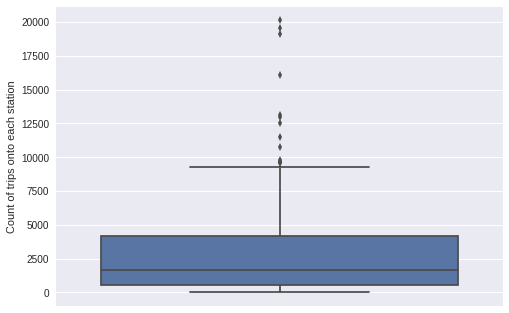

In [23]:
import seaborn as sns
sns.boxplot(y = n_trips)

In [24]:
# Надо выбрать количество поездок за промежуток времени, при котором станция будет "популярной". Я бы взял 
trips_count_threshold = 100
stat_popularity = n_trips > trips_count_threshold

In [25]:
stat_popularity[bikestations['short_name']].head()

short_name
31000    True
31001    True
31002    True
31003    True
31004    True
Name: Count of trips onto each station, dtype: object

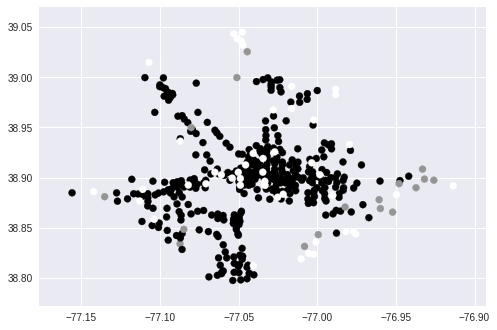

In [26]:
coords = bikestations[['lat','lon']].values
plt.scatter(coords[:,1], coords[:, 0], c = stat_popularity[bikestations['short_name']].fillna(-1))
#Есть настолько новые станции, что поездок еще нет. Как с этим бороться? 
#Вариант такой - резать bikestations по тем станциям, которых не было. 

### Что не может не радовать - низкопопулярные точки находятся только на окраинах. 
Проведем более точную градацию популярности:

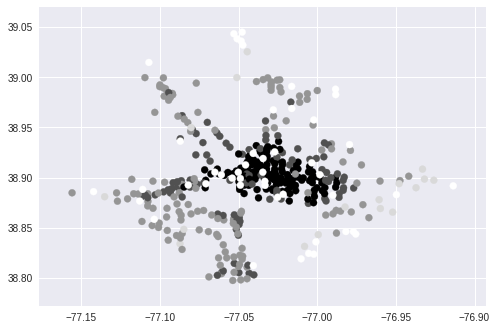

In [27]:
trips_count_threshold_1 = 100
trips_count_threshold_2 = 1000
trips_count_threshold_3 = 3000
stat_popularity_mod = (n_trips > trips_count_threshold_1).astype(int) + (n_trips > trips_count_threshold_2).astype(int) +(n_trips > trips_count_threshold_3).astype(int)

plt.scatter(coords[:,1], coords[:, 0], c = stat_popularity_mod[bikestations['short_name']].fillna(-1))

### Что мы теперь знаем:
* Распределение относительно расстояния до центра города равномерное 
* Для новых точек мы сможем грузить параметры по их местоположению

### О чем надо подумать:
* Здесь данные за 3 месяца поездок. По медиане отправлений с станций в день 1600/92 < 20. Это очень мало, на таких данных не обучишься хорошо. В идеале можно было бы проводить регрессию отдельно для каждой станции, но при таком объеме данных это создаст много проблем(ремонты станций, дорог и т.д.)
* Я пока рассмотрел только поездки "из". Нужно рассмотреть "в" и решить, как их объединять/не объединять.

Теперь придумаем модель того, как будем строить регрессию. Данных не хватает явно, посему идея такая:
Берем точки, в которых данных больше всего, ближайшие к ним не столь популярные точки приклеиваем в их кластер и делаем регрессию по кластерам. Что это даст:
* Мы сможем не заботиться о том, что когда-то был ремонт на станции, это размажется по соседним
* Мы сможем внедрить новые станции, просто размазав по ним нагрузку соседей
* Для каждого кластера коэффициенты регрессии подберутся индивидуально, что должно дать более высокую точность относительно общей регрессии

### Что нужно проверить
* Каждый кластер имеет достаточно данных для обработки
* Поведение пользователей в кластерах циклично относительно времени суток

### Идеи для кластеризации
* Z-score для координат и количества поездок, новые станции(без поездок) не учитываем.
* Количество кластеров придется брать самим. Либо вспомнить алгоритм иерархической кластеризации, который бы мог как критерий останова брать сумму поездок.

In [28]:
stations_zscore = bikestations[['lat','lon','short_name']]

In [29]:
stations_zscore.loc[:,'count_out'] = df['Start station number'].value_counts(sort = False)[stations_zscore.short_name].values
stations_zscore.loc[:,'count_in'] = df['End station number'].value_counts(sort = False)[stations_zscore.short_name].values
stations_zscore = stations_zscore.dropna()
stations_zscore.tail()

/home/peter/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/peter/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,lat,lon,short_name,count_out,count_in
403,38.949813,-77.080217,31319,75.0,36.0
404,38.912630,-76.971923,31520,134.0,137.0
405,38.897407,-76.925907,31713,19.0,26.0
406,38.870695,-76.982359,31812,9.0,22.0
421,38.884916,-77.005965,31643,486.0,423.0


In [30]:
df_buffer = stations_zscore.copy()

In [31]:
stations_zscore.index = stations_zscore.short_name.astype(np.int64)
stations_zscore.lat = (stations_zscore.lat - stations_zscore.lat.mean())/stations_zscore.lat.std()
stations_zscore.lon = (stations_zscore.lon - stations_zscore.lon.mean())/stations_zscore.lon.std()
stations_zscore.count_in = (stations_zscore.count_in - stations_zscore.count_in.mean())/stations_zscore.count_in.std()
stations_zscore.count_out = (stations_zscore.count_out - stations_zscore.count_out.mean())/stations_zscore.count_out.std()
stations_zscore.head()

,lat,lon,short_name,count_out,count_in
short_name,,,,,
31000,-0.913455,-0.293025,31000,-0.664920,-0.621524
31001,-0.953264,-0.295329,31001,-0.633042,-0.605281
31002,-0.972348,-0.190651,31002,-0.191588,-0.078765
31003,-0.885720,-0.199895,31003,-0.323606,-0.279196
31004,-0.939015,-0.453320,31004,-0.623060,-0.600071


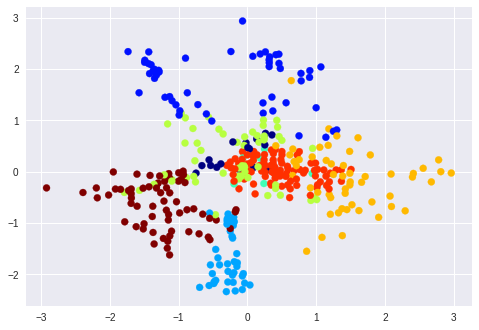

In [32]:
from sklearn.mixture import GaussianMixture
z = GaussianMixture(n_components=8).fit(stations_zscore[['lat','lon','count_out','count_in']].values).predict(stations_zscore[['lat','lon','count_out','count_in']].values)
plt.scatter(stations_zscore.values[:,1],stations_zscore.values[:,0],cmap="jet",c = z)

Посчитаем для каждого кластера суточное число поездок.

In [33]:
z.shape

(384,)

In [34]:
df_stations_clusters = pd.DataFrame(df_buffer)
df_stations_clusters

,lat,lon,short_name,count_out,count_in
0,38.858971,-77.053230,31000,710.0,747.0
1,38.857250,-77.053320,31001,809.0,800.0
2,38.856425,-77.049232,31002,2180.0,2518.0
3,38.860170,-77.049593,31003,1770.0,1864.0
4,38.857866,-77.059490,31004,840.0,817.0
5,38.862303,-77.059936,31005,2601.0,2724.0
6,38.863700,-77.063300,31006,1316.0,1490.0
7,38.857405,-77.051132,31007,2137.0,1687.0
8,38.862900,-77.052800,31008,1688.0,1779.0
9,38.848441,-77.051516,31009,1465.0,1478.0
